In [8]:
import os

path = r'D:\Proyek Aksara\Datasets'

# Cek isi direktori
os.listdir(path)


['aksarali', 'aksarawa', 'aksarunda']

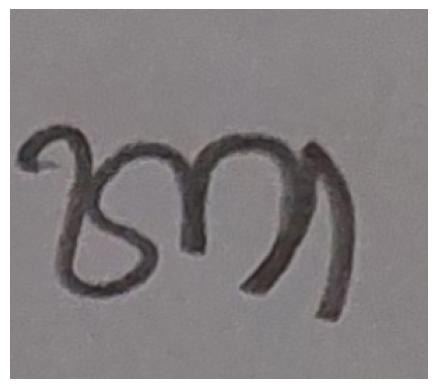

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

# Contoh memuat gambar karakter 'na' dari aksarali
img_path = os.path.join(path, 'aksarali', 'ba', 'Ba_1.jpg')
img = Image.open(img_path)

# Menampilkan gambar sebagai contoh
plt.imshow(img)
plt.axis('off')
plt.show()


In [10]:
# List semua folder di dalam dataset_path
dataset_structure = {}

for root, dirs, files in os.walk(path):
    if dirs:
        dataset_structure[root] = dirs

# Cetak struktur dataset
for folder, subfolders in dataset_structure.items():
    print(f"Folder: {folder}")
    print(f"Subfolders: {subfolders}")
    print()

# Menampilkan isi dari setiap subfolder
for folder, subfolders in dataset_structure.items():
    print(f"Folder: {folder}")
    for subfolder in subfolders:
        subfolder_path = os.path.join(folder, subfolder)
        files = os.listdir(subfolder_path)
        print(f"- Subfolder: {subfolder} ({len(files)} files)")
        # Jika perlu, bisa juga mencetak beberapa nama file untuk melihat contoh gambar
        if len(files) > 0:
            print(f"  Contoh file: {files[:3]}")  # Cetak 3 nama file pertama
    print()


Folder: D:\Proyek Aksara\Datasets
Subfolders: ['aksarali', 'aksarawa', 'aksarunda']

Folder: D:\Proyek Aksara\Datasets\aksarali
Subfolders: ['ba', 'ca', 'da', 'eight', 'five', 'four', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nine', 'nya', 'one', 'pa', 'ra', 'sa', 'seven', 'six', 'ta', 'three', 'two', 'wa', 'ya', 'zero']

Folder: D:\Proyek Aksara\Datasets\aksarawa
Subfolders: ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

Folder: D:\Proyek Aksara\Datasets\aksarunda
Subfolders: ['a', 'ba', 'ca', 'da', 'e', 'eu', 'fa', 'ga', 'ha', 'i', 'ja', 'ka', 'kha', 'la', 'ma', 'na', 'nga', 'nya', 'o', 'pa', 'qa', 'ra', 'sa', 'sya', 'ta', 'u', 'va', 'wa', 'xa', 'ya', 'za', 'é']

Folder: D:\Proyek Aksara\Datasets
- Subfolder: aksarali (28 files)
  Contoh file: ['ba', 'ca', 'da']
- Subfolder: aksarawa (20 files)
  Contoh file: ['ba', 'ca', 'da']
- Subfolder: aksarunda (32 files)
  Contoh file: ['a', 'ba', 'ca']

Fol

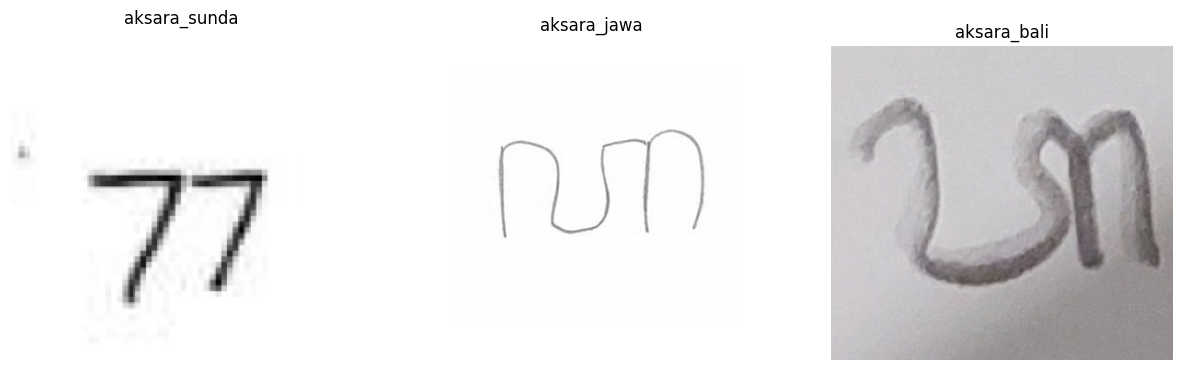

In [11]:
import os
from PIL import Image
import matplotlib.pyplot as plt

base_path = r'D:\Proyek Aksara\Datasets'
dataset_paths = {
    'aksara_sunda': os.path.join(base_path, 'aksarunda'),
    'aksara_jawa': os.path.join(base_path, 'aksarali'),
    'aksara_bali': os.path.join(base_path, 'aksarali')
}

# Tentukan subfolder yang akan digabungkan
relevant_subfolders = {
    'aksara_sunda': ['ka', 'ga', 'nga', 'ca', 'ja', 'nya',
                     'ta', 'da', 'na', 'pa', 'ba', 'ma',
                     'ya', 'ra', 'la', 'wa', 'sa', 'ha',
                     'fa', 'va', 'qa', 'xa', 'za',
                     'kha', 'sya',
                     'a', 'e', 'eu', 'i', 'o', 'u', 'é'],
    'aksara_jawa': ['ha', 'na', 'ca', 'ra', 'ka',
                    'da', 'ta', 'sa', 'wa', 'la',
                    'pa', 'dha', 'ja', 'ya', 'nya',
                    'ma', 'ga', 'ba', 'tha', 'nga'],
    'aksara_bali': ['ha', 'na', 'ca', 'ra', 'ka',
                    'da', 'ta', 'sa', 'wa', 'la',
                    'ma', 'ga', 'ba', 'nga',
                    'pa', 'ja', 'ya', 'nya']
}

# List untuk menyimpan path citra dan labelnya
image_paths_labels = []

# Loop melalui dataset dan gabungkan citra
for label, folder_path in dataset_paths.items():
    for subfolder in relevant_subfolders[label]:
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.exists(subfolder_path):
            for filename in os.listdir(subfolder_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                    image_path = os.path.join(subfolder_path, filename)
                    image_paths_labels.append((image_path, label))

# Tampilkan contoh citra dari masing-masing label
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
unique_labels = list(dataset_paths.keys())

for i, ax in enumerate(axes):
    label = unique_labels[i]
    sample_image_path = next((path for path, lbl in image_paths_labels if lbl == label), None)
    if sample_image_path:
        sample_image = Image.open(sample_image_path)
        ax.imshow(sample_image)
        ax.set_title(label)
        ax.axis('off')

plt.show()


In [12]:
import os
from collections import defaultdict
# Dictionary untuk menyimpan jumlah citra per label
image_counts = defaultdict(int)

# List untuk menyimpan path citra dan labelnya
image_paths_labels = []

# Loop melalui dataset dan hitung citra
for label, folder_path in dataset_paths.items():
    for subfolder in relevant_subfolders[label]:
        subfolder_path = os.path.join(folder_path, subfolder)
        if os.path.exists(subfolder_path):
            for filename in os.listdir(subfolder_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                    image_path = os.path.join(subfolder_path, filename)
                    image_paths_labels.append((image_path, label))
                    image_counts[label] += 1

# Outputkan jumlah citra dalam masing-masing label
for label, count in image_counts.items():
    print(f"Jumlah citra untuk label '{label}': {count}")


Jumlah citra untuk label 'aksara_sunda': 20224
Jumlah citra untuk label 'aksara_jawa': 9995
Jumlah citra untuk label 'aksara_bali': 4493


In [13]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

# Tentukan path dataset
base_path = r'D:\Proyek Aksara\Datasets'
dataset_paths = {
    'aksara_sunda': os.path.join(base_path, 'aksarunda'),
    'aksara_jawa': os.path.join(base_path, 'aksarali'),
    'aksara_bali': os.path.join(base_path, 'aksarali')
}

def load_image_paths_labels(base_path, relevant_subfolders):
    image_paths_labels = []
    for label, folder_path in base_path.items():
        for subfolder in relevant_subfolders[label]:
            subfolder_path = os.path.join(folder_path, subfolder)
            if os.path.exists(subfolder_path):
                for filename in os.listdir(subfolder_path):
                    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                        image_path = os.path.join(subfolder_path, filename)
                        image_paths_labels.append((image_path, label))
    return image_paths_labels

relevant_subfolders = {
    'aksara_sunda': ['ka', 'ga', 'nga', 'ca', 'ja', 'nya',
                     'ta', 'da', 'na', 'pa', 'ba', 'ma',
                     'ya', 'ra', 'la', 'wa', 'sa', 'ha',
                     'fa', 'va', 'qa', 'xa', 'za',
                     'kha', 'sya',
                     'a', 'e', 'eu', 'i', 'o', 'u', 'é'],
    'aksara_jawa': ['ha', 'na', 'ca', 'ra', 'ka',
                    'da', 'ta', 'sa', 'wa', 'la',
                    'pa', 'dha', 'ja', 'ya', 'nya',
                    'ma', 'ga', 'ba', 'tha', 'nga'],
    'aksara_bali': ['ha', 'na', 'ca', 'ra', 'ka',
                    'da', 'ta', 'sa', 'wa', 'la',
                    'ma', 'ga', 'ba', 'nga',
                    'pa', 'ja', 'ya', 'nya']
}

image_paths_labels = load_image_paths_labels(dataset_paths, relevant_subfolders)

# Pisahkan path dan label
image_paths, labels = zip(*image_paths_labels)

# Convert labels ke bentuk numerik
label_map = {'aksara_sunda': 0, 'aksara_jawa': 1, 'aksara_bali': 2}
numeric_labels = [label_map[label] for label in labels]

# Pisahkan data menjadi train dan test (70:30)
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, numeric_labels, test_size=0.3, stratify=numeric_labels, random_state=42
)


In [14]:
import os
import shutil
import numpy as np
from sklearn.model_selection import train_test_split

# Utility function to split data
def split_data(base_path, output_base_path, split_ratio=0.7):
    for label, folder_path in base_path.items():
        for subfolder in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder)
            if os.path.isdir(subfolder_path):
                files = [f for f in os.listdir(subfolder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
                train_files, test_files = train_test_split(files, test_size=1-split_ratio, random_state=42)

                # Create train and test directories
                train_output_dir = os.path.join(output_base_path, 'train', label, subfolder)
                test_output_dir = os.path.join(output_base_path, 'test', label, subfolder)
                os.makedirs(train_output_dir, exist_ok=True)
                os.makedirs(test_output_dir, exist_ok=True)

                for file in train_files:
                    shutil.copy(os.path.join(subfolder_path, file), os.path.join(train_output_dir, file))
                for file in test_files:
                    shutil.copy(os.path.join(subfolder_path, file), os.path.join(test_output_dir, file))

# Apply the split
output_base_path = r'D:\Proyek Aksara\Datasets_split'
split_data(dataset_paths, output_base_path)


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Path dataset split
train_dir = os.path.join(output_base_path, 'train')
test_dir = os.path.join(output_base_path, 'test')

# ImageDataGenerator untuk augmentasi dan preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Buat generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='sparse'
)


Found 25996 images belonging to 3 classes.
Found 11204 images belonging to 3 classes.


BASE MODEL with 3 CONVOLUTION LAYER
2 EPOCHS

In [16]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = test_generator.samples // test_generator.batch_size


history = model.fit(
    train_generator,
    epochs=2,
    validation_data=test_generator,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)


test_loss, test_acc = model.evaluate(test_generator)
print(f'Akurasi pada data pengujian: {test_acc:.2f}')


c:\Users\p\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2


c:\Users\p\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


812/812 ━━━━━━━━━━━━━━━━━━━━ 461s 564ms/step - accuracy: 0.8594 - loss: 0.3861 - val_accuracy: 0.9886 - val_loss: 0.0366
Epoch 2/2
812/812 ━━━━━━━━━━━━━━━━━━━━ 0s 56us/step - accuracy: 0.9375 - loss: 0.1821 - val_accuracy: 1.0000 - val_loss: 0.0240


c:\Users\p\miniconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


351/351 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.9846 - loss: 0.0489
Akurasi pada data pengujian: 0.98


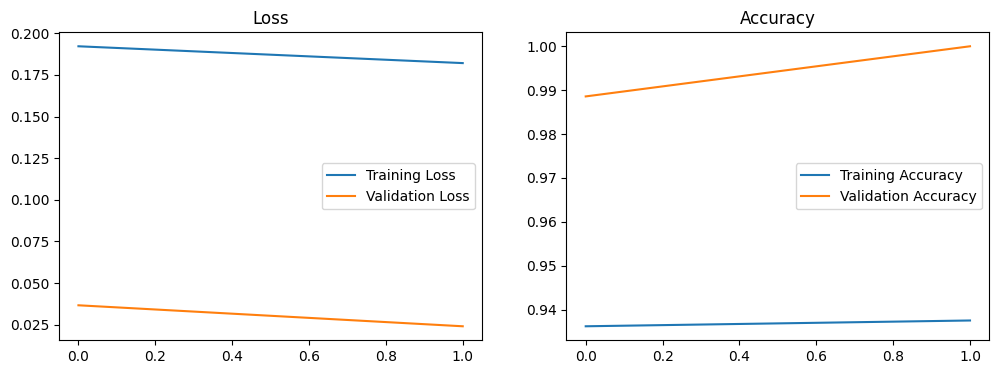

In [17]:
# Plot hasil training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()


TESTING FOR DATA OUTSIDES DATASETS

In [18]:
# Save the model
model.save('aksara_classifier_model.h5')


In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
from ipywidgets import FileUpload, Image, VBox, Output, Label
from IPython.display import display
import io

# Load the model
model = load_model('aksara_classifier_model.h5')

# Class labels
class_labels = ['aksara_bali', 'aksara_jawa', 'aksara_sunda']

# Function to classify image
def classify_image(img_array):
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    predictions = model.predict(img_array)
    predicted_class = class_labels[np.argmax(predictions)]
    return predicted_class

# Widget for file upload
upload_widget = FileUpload(accept='image/*', multiple=False)
output = Output()

def on_upload_change(change):
    with output:
        output.clear_output()
        if not upload_widget.value:
            return
        
        # Get the uploaded file
        uploaded_file = upload_widget.value[0]  # Access the first item of the tuple
        content = uploaded_file.content  # Access the content directly
        
        # Convert content to image array
        img = load_img(io.BytesIO(content), target_size=(128, 128))
        img_array = img_to_array(img)
        
        # Classify the uploaded image
        predicted_class = classify_image(img_array)
        
        # Display the uploaded image and classification result
        display_img = Image(value=content, format='png', width=300, height=300)
        result_label = Label(f'Classified as: {predicted_class}')
        display(VBox([display_img, result_label]))

upload_widget.observe(on_upload_change, names='value')

# Display the upload widget and output
display(VBox([upload_widget, output]))